<img src='../../images/course_logo_2024.jpg'/>
<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 4 רשתות נורונים מבוא</h1>
    <h1 style="text-align: center;"> Neural Network intuition</h1>
</div>

In [1]:
import graphviz
import numpy as np
from ipywidgets import interact, widgets
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import time




In [2]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

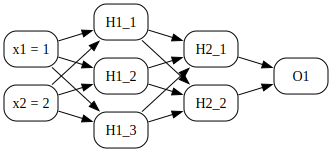

In [3]:
gv( """
    node [shape=box, style=rounded];

    // Input Layer
    I1 [label="x1 = 1", order=1];
    I2 [label="x2 = 2", order=2];

    // First Hidden Layer
    H1_1;
    H1_2;
    H1_3;

    // Second Hidden Layer
    H2_1;
    H2_2;

    // Output Layer
    O1;

    // Input to First Hidden
   //<<font color=red>0.5</font>>
    I1 -> H1_1;
    I1 -> H1_2;
    I1 -> H1_3;
    I2 -> H1_1;
    I2 -> H1_2;
    I2 -> H1_3;

    // First Hidden to Second Hidden
    H1_1 -> H2_1;
    H1_1 -> H2_2;
    H1_2 -> H2_1;
    H1_2 -> H2_2;
    H1_3 -> H2_1;
    H1_3 -> H2_2;

    // Second Hidden to Output
    H2_1 -> O1;
    H2_2 -> O1
""")


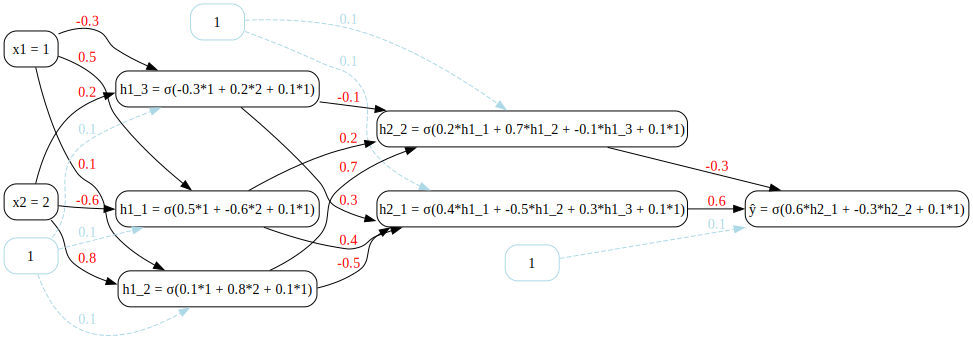

In [4]:
gv( """
    node [shape=box, style=rounded];

    // Input Layer
    I1 [label="x1 = 1", order=1];
    I2 [label="x2 = 2", order=2];
    I0  [label = 1, color=lightblue];

    // First Hidden Layer
    H10 [label="1",  color=lightblue];
    H1_1 [label="h1_1 = σ(0.5*1 + -0.6*2 + 0.1*1)"];
    H1_2 [label="h1_2 = σ(0.1*1 + 0.8*2 + 0.1*1)"];
    H1_3 [label="h1_3 = σ(-0.3*1 + 0.2*2 + 0.1*1)"];

    // Second Hidden Layer
    H2_1 [label="h2_1 = σ(0.4*h1_1 + -0.5*h1_2 + 0.3*h1_3 + 0.1*1)"];
    H2_2 [label="h2_2 = σ(0.2*h1_1 + 0.7*h1_2 + -0.1*h1_3 + 0.1*1)"];
    H2_0 [label="1",  color=lightblue];

    // Output Layer
    O1 [label="ŷ = σ(0.6*h2_1 + -0.3*h2_2 + 0.1*1)"];

    // Input to First Hidden
   //<<font color=red>0.5</font>>
    I0 -> H1_1 [style =dashed color=lightblue label= <<font color="lightblue">0.1</font>>]
    I0 -> H1_2 [style =dashed color=lightblue label= <<font color="lightblue">0.1</font>>]
    I0 -> H1_3 [style =dashed color=lightblue label= <<font color="lightblue">0.1</font>>]
    I1 -> H1_1 [label=<<font color="red">0.5</font>>];
    I1 -> H1_2 [label=<<font color="red">0.1</font>>];
    I1 -> H1_3 [label=<<font color="red">-0.3</font>>];
    I2 -> H1_1 [label=<<font color="red">-0.6</font>>];
    I2 -> H1_2 [label=<<font color="red">0.8</font>>];
    I2 -> H1_3 [label=<<font color="red">0.2</font>>];

    // First Hidden to Second Hidden
    H10 -> H2_1 [style =dashed color=lightblue label=<<font color="lightblue">0.1</font>>]
    H10 -> H2_2 [style =dashed color=lightblue label=<<font color="lightblue">0.1</font>>]
    H1_1 -> H2_1 [label=<<font color="red">0.4</font>>];
    H1_1 -> H2_2 [label=<<font color="red">0.2</font>>];
    H1_2 -> H2_1 [label=<<font color="red">-0.5</font>>];
    H1_2 -> H2_2 [label=<<font color="red">0.7</font>>];
    H1_3 -> H2_1 [label=<<font color="red">0.3</font>>];
    H1_3 -> H2_2 [label=<<font color="red">-0.1</font>>];

    // Second Hidden to Output
    H2_0 -> O1 [style =dashed color=lightblue label= <<font color="lightblue">0.1</font>>]
    H2_1 -> O1 [label=<<font color="red">0.6</font>>];
    H2_2 -> O1 [label=<<font color="red">-0.3</font>>]
""")

<div style='font-size: large;' align ='center'>Input and First Layer</div>

$$
\left[ \begin{array}{c} 1 & 2 & 1\end{array} \right]
\left[ \begin{array}{cccccc}
-0.3 & 0.5 & 0.1 \\
0.2 & -0.6 & 0.8 \\
0.1 & 0.1 & 0.1 \\
\end{array}\right] = \left[ \begin{array}{c} 0.2 & -0.6 & 1.8\end{array} \right]
$$
<div style='font-size: large;' align ='center'>Output of first layer and Second Layer</div>
<div style='font-size: xx-large;' align ='center'>↩️</div>
$$
\left[ \begin{array}{c} 0.2 & -0.6 & 1.8 & 1\end{array} \right]
\left[ \begin{array}{cccccc}
0.2 & 0.4  \\
0.7 & -0.5\\
-0.1 & 0.3\\
0.1 & 0.1\\
\end{array}\right] = \left[ \begin{array}{c} 0.46 & 1.02\end{array} \right]
$$
<div style='font-size: large;' align ='center'>Output of second layer and the Output Layer</div>
<div style='font-size: xx-large;' align ='center'>↩️</div>
$$
\left[ \begin{array}{c} 0.46 & 1.02 & 1\end{array} \right]
\left[ \begin{array}{cccccc}
0.6\\
-0.3\\
0.1\\
\end{array}\right] = \left[ \begin{array}{c} 0.07\end{array} \right]
$$


In [5]:


# Define the left matrix (3x1)
input_layer = np.array([[1], [2], [1]])

# Define the right matrix (3x3)
layer_one = np.array([
    [-0.3, 0.5, 0.1],
    [0.2, -0.6, 0.8],
    [0.1, 0.1, 0.1]
])

# Perform matrix multiplication
result = np.dot(input_layer.T, layer_one)

print(result)

[[ 0.2 -0.6  1.8]]


In [6]:


# Define the left matrix (3x1)
layer_one_output = np.array([[0.2], [-0.6], [1.8], [1]])

# Define the right matrix (3x3)
layer_two = np.array([
    [0.2, 0.4],
    [0.7, -0.5],
    [-0.1, 0.3],
    [0.1, 0.1],
   
])

# Perform matrix multiplication
result = np.dot(layer_one_output.T, layer_two)

print(result)

[[-0.46  1.02]]


In [7]:


# Define the left matrix (3x1)
layer_two_output = np.array([[0.46], [1.02], [1]])

# Define the right matrix (3x3)
output_layer = np.array([
    [0.6],
    [-0.3],
    [0.1],
   
])

# Perform matrix multiplication
result = np.dot(layer_two_output.T, output_layer)

print(result)

[[0.07]]


## Activation Function?

This function outputs values between 0 and 1, making it suitable for binary classification problems. When applied to the outputs of a neural network, it maps any input to a probability-like value.
The logistic function, or sigmoid function, transforms linear regression into logistic regression, making it useful for classification tasks. Here’s how it works and why it’s useful:


Benefits for Gradient Descent

1.	Smoothness: <br/> The logistic function is smooth and differentiable, which is essential for gradient-based optimization methods. The smooth curve allows for continuous changes in the gradient, leading to more stable and effective updates during training.
2.	Non-Linearity: <br/>
By introducing non-linearity, the logistic function enables neural networks to learn complex patterns. Without non-linear activation functions like the sigmoid, the model would only be able to represent linear relationships, limiting its expressive power.
3.	Gradient Calculation:<br/>
The derivative of the logistic function is straightforward and has a convenient property:
 \sigma{\prime}(x) = \sigma(x) (1 - \sigma(x)) 
This simplicity makes it easier to compute the gradients during backpropagation, which is the core mechanism for updating weights in neural networks using gradient descent.
4.	Probabilistic Interpretation:<br/>
The logistic function outputs probabilities, which are useful for classification tasks. The probabilistic output can be directly interpreted in terms of likelihoods, making the model’s predictions more interpretable.


# $g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In [8]:
g = lambda z: 1/(1+np.exp(-z))

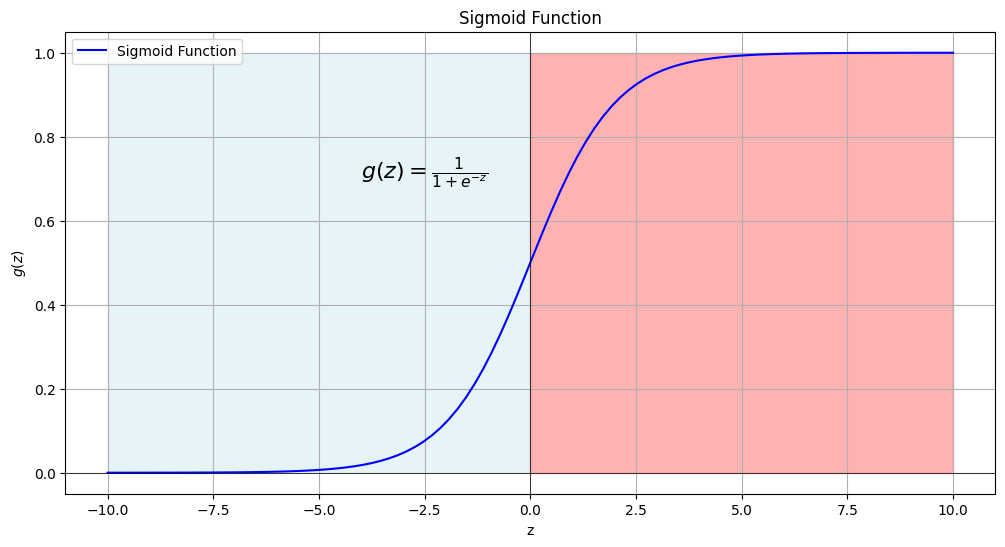

In [9]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Generate y values using the sigmoid function
y_values = g(x_values)

# Draw blue rectangle on the left side
blue_rectangle = plt.Rectangle((0, 0), -10, 1, color='lightblue', alpha=0.3)
ax.add_patch(blue_rectangle)

# Draw orange rectangle on the right side
orange_rectangle = plt.Rectangle((0, 0), 10, 1, color='red', alpha=0.3)
ax.add_patch(orange_rectangle)

# Plot the sigmoid function
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')

# Include the equation in the plot
plt.text(-2.5, 0.7, r'$g(z) = \frac{1}{1 + e^{-z}}$', fontsize=16, ha='center')

# Set labels and title
plt.xlabel('z')
plt.ylabel(r'$g(z)$')
plt.title('Sigmoid Function')



# Display the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()


# $g(z) = \frac{1}{1+e^{-z}}\tag{1}$

# $\text{If } \hat{y} \geq 0.5 \text{, predict } 1$<br/>
# $\text{If } \hat{y} < 0.5 \text{, predict } 0$


A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

# $$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

# where

#  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$

# $z = \mathbf{w} \cdot \mathbf{x} + b$

In [10]:
df = pd.DataFrame({ 'x': [0,1,2,3,4,5], 'y': [0, 0 ,0, 1, 1, 1]})
x_train = df['x'].values
y_train = df['y'].values
x_train = x_train.reshape(-1,1)


In [11]:
g = lambda z: 1/(1+np.exp(-z))

In [12]:

@interact(w=(0.0,1,0.01), b=(-10, 10, 0.1))
def h1(w=0, b=0):
    z = lambda x: x*w + b

    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    x_res = np.arange(-10,10,0.05)
    gz = g(z(x_res))
    filter = np.round(gz,1) == 0.5
    x_ = x_res[filter][0]
    try:
        # Draw blue rectangle on the left side
        blue_rectangle = plt.Rectangle((x_, 0), -10, 1, color='lightblue', alpha=0.3)
        ax.add_patch(blue_rectangle)
        
        # Draw orange rectangle on the right side
        orange_rectangle = plt.Rectangle((x_, 0), 10, 1, color='red', alpha=0.3)
        ax.add_patch(orange_rectangle)
    except:
        pass
    
    # Create the scatter plot
    plt.scatter(x_train[y_train == 1], y_train[y_train == 1], marker='x', label='y=1', s = 50)
    plt.scatter(x_train[y_train == 0], y_train[y_train == 0], marker='o', label='y=0', s = 50)
    
    plt.plot(x_res, z(x_res), color='lightblue', linestyle='--', label='Linear Regression')
    plt.plot(x_res, g(z(x_res)), color='darkblue', linestyle='--', label='Logistic Regression')


    # Set labels and title
    plt.xlabel('Z')
    plt.ylabel('G')
    plt.title('Logistic Regression classification one variable')
    
    plt.ylim(-0.1,1.1)
    # Show legend
    plt.legend()
    
    # Show the plot
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

## Torch and derivatives
https://docs.google.com/presentation/d/e/2PACX-1vTbi5gKvG0cGmWVu147rs7PCvrO_kxIF2CmyQ89k4cSGvqvUZo8XPdZNclsUcRd98nCk9bZNduxn9Da/pub?start=false&loop=false&delayms=3000

In [13]:
x = torch.arange(5, dtype=float, requires_grad=True)  # input tensor
w = 2
b = 1


In [14]:
x

tensor([0., 1., 2., 3., 4.], dtype=torch.float64, requires_grad=True)

In [15]:
z1 = x * w + b

In [16]:
z2 = z1 ** 2

In [17]:
first_derivative = torch.autograd.grad(z2[2], x, create_graph=True)[0]
# We now have dloss/dx
second_derivative = torch.autograd.grad(first_derivative[2], x)[0]
# This computes d/dx(dloss/dx) = d2loss/dx2

In [18]:
first_derivative

tensor([ 0.,  0., 20.,  0.,  0.], dtype=torch.float64, grad_fn=<MulBackward0>)

In [19]:
second_derivative

tensor([0., 0., 8., 0., 0.], dtype=torch.float64)

In [20]:
z2

tensor([ 1.,  9., 25., 49., 81.], dtype=torch.float64, grad_fn=<PowBackward0>)

In [21]:
z1

tensor([1., 3., 5., 7., 9.], dtype=torch.float64, grad_fn=<AddBackward0>)

In [22]:
import numpy as np
import torch

# Create a NumPy array
numpy_array = np.array([[1, 2, 3],
                        [4, 5, 6]])

# Convert NumPy array to PyTorch tensor
torch_tensor = torch.tensor(numpy_array)

# Print the converted tensor
print(torch_tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [23]:
# Define the left matrix (3x1)
input_matrix = np.array([[1, 2, 1]])
input_matrix = torch.tensor(input_matrix).to(torch.float64)
# Define the right matrix (3x3)
layer_one = np.array([
    [-0.3, 0.5, 0.1],
    [0.2, -0.6, 0.8],
    [0.1, 0.1, 0.1]
])

# Define Layer two
layer_two = np.array([
    [0.2, 0.4],
    [0.7, -0.5],
    [-0.1, 0.3],
    [0.1, 0.1],
   
])

# Define output layer
output_layer = np.array([
    [0.6],
    [-0.3],
    [0.1],
   
])

layer_one = torch.tensor(layer_one, requires_grad=True)
layer_two = torch.tensor(layer_two, requires_grad=True)
output_layer = torch.tensor(output_layer,  requires_grad=True)


In [24]:

# Compute the dot product
input_layer_one = input_matrix @ layer_one



In [25]:

output_layer_1 = torch.cat((input_layer_one, torch.tensor([1]).unsqueeze(0)), dim=1)


In [26]:
output_layer_2 = output_layer_1 @ layer_two

In [27]:
output_layer_2 = torch.cat((output_layer_2, torch.tensor([1]).unsqueeze(0)), dim=1)


In [28]:
prediction = output_layer_2 @ output_layer


In [29]:
actsual = 2

In [30]:
delta = (torch.abs(prediction-actsual)).mean()

In [31]:
delta.backward()

In [32]:
with torch.no_grad(): 
    output_layer_derivative = output_layer.grad
    layer_two_derivatives = layer_two.grad
    layer_one_derivative = layer_one.grad

In [33]:
output_layer_derivative

tensor([[ 0.4600],
        [-1.0200],
        [-1.0000]], dtype=torch.float64)

In [34]:
layer_two_derivatives

tensor([[-0.1200,  0.0600],
        [ 0.3600, -0.1800],
        [-1.0800,  0.5400],
        [-0.6000,  0.3000]], dtype=torch.float64)

In [35]:
layer_one_derivative

tensor([[ 0.0000, -0.5700,  0.1500],
        [ 0.0000, -1.1400,  0.3000],
        [ 0.0000, -0.5700,  0.1500]], dtype=torch.float64)

## NN Template

In [2]:
class TabularModel(nn.Module):

    def __init__(self, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_in = n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.Sigmoid())
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self,  x_cont):

        x = self.layers(torch.cat([self.bn_cont(x_cont)],1))
        return x

In [3]:
#https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [ ]:
df = pd.read_csv('mnist_train.csv')


In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape


(60000, 785)

In [ ]:
df = df.sample(frac=0.25).reset_index(drop=True)

In [ ]:
df['label'].value_counts()


label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [ ]:
df['label'].value_counts().sum()

60000

In [ ]:
X = df.drop('label' , axis = 'columns')
y = df['label']

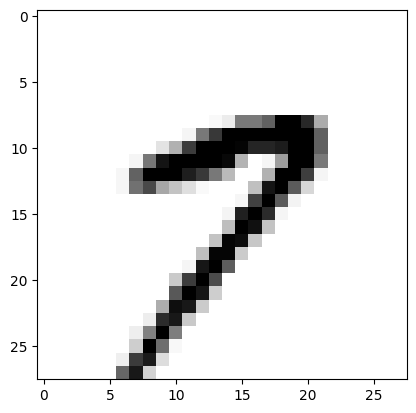

In [ ]:
plt.imshow(X.values[71].reshape(28,28),cmap='gray_r')
plt.show()

In [ ]:
len_ = len(df)
test_size = int(len_ * .25)


In [ ]:
test_size

15000

In [ ]:
x_train = torch.tensor(X[:len_-test_size].values, dtype=torch.float)
x_test = torch.tensor(X[len_-test_size:len_].values, dtype=torch.float)

In [ ]:
y_train = torch.tensor(y[:len_-test_size].values, dtype=torch.float)
y_test = torch.tensor(y[len_-test_size:len_].values, dtype=torch.float)

In [ ]:
train_dataset = TensorDataset(x_train, y_train)

# Create a DataLoader
dl_batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=dl_batch_size, shuffle=True)




In [ ]:
model_1 = TabularModel(X.shape[1], 1, [10, 5, 2], p=0.4)


In [ ]:
model_1

TabularModel(
  (bn_cont): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): Sigmoid()
    (6): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=5, out_features=2, bias=True)
    (9): Sigmoid()
    (10): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [ ]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.002)

In [36]:
start_time = time.time()

epochs = 150
losses = []

for epoch in range(epochs):
    epoch+=1
    epoch_loss = 0.0
    
    for batch_x, batch_y in train_loader:
        # Move the batch data to the device
        batch_x, batch_y = batch_x, batch_y

        # Forward pass
        y_pred = model_1(batch_x)
        loss = torch.sqrt(criterion(y_pred, batch_y))  # RMSE
        epoch_loss += loss.item()

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Calculate the average loss for the epoch
    epoch_loss /= len(train_loader)
    losses.append(epoch_loss)


    # y_pred = model_1(x_train)
    # loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    # losses.append(loss)

    # a neat trick to save screen space:
    if epoch%25 == 1:
        print(f'epoch: {epoch:3}  loss: {loss.item():10.8f}')

    # optimizer.zero_grad()
    # loss.backward()
    # optimizer.step()

print(f'epoch: {epoch:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed
     


/Users/shai/Documents/Google Drive Shone 2022/Articles/Population demographics tracking and estimation tool/demographic_estimation_dashboard_article/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/shai/Documents/Google Drive Shone 2022/Articles/Population demographics tracking and estimation tool/demographic_estimation_dashboard_article/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([45000])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:   1  loss: 3.45946908
epoch:  26  loss: 3.04661942
epoch:  51  loss: 2.49815583
